In [ ]:
## Lesson: Correlation Coefficients ##

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats, probplot

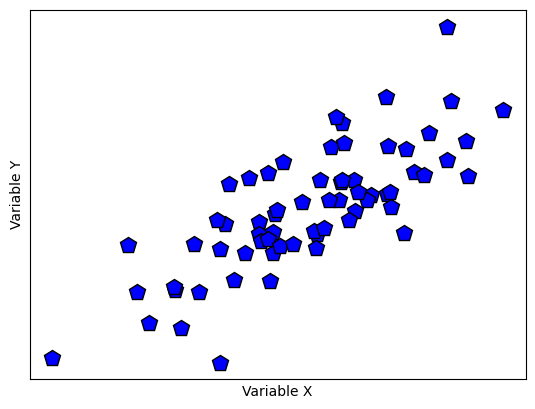

In [14]:
## simulate data
N = 66

# generate correlated data
x = np.random.randn(N)
y = x + np.random.randn(N)

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

In [28]:
# pre-compute the means
meanX = np.mean(x)
meanY = np.mean(y)

In [39]:
# compute the covariance

### the loop method
covar1 = 0
for i in range(N):
    covar1 = covar1 + (x[i]-meanX)*(y[i]-meanY)
    
# the normalization
covar1 = covar1/(N-1)
print(covar1)

1.2632513491482102


In [40]:
# compute the covariance
# Linear Algebra Method
xCent = x-meanX
yCent = y-meanY
covar2 = np.dot(xCent,yCent) / (N-1)
print(covar2)

1.26325134914821


In [41]:
# compute the covariance
# numpy method

covar3 = np.cov(np.vstack((x,y)))
print(covar3)

[[1.12958872 1.26325135]
 [1.26325135 2.32515786]]


In [43]:
## compute the correlation

### the long method
corr_num = sum( (x-meanX) * (y-meanY) )
corr_den = sum((x-meanX)**2) * sum((y-meanY)**2)
corr1 = corr_num/np.sqrt(corr_den)


### the Python method
corr2 = np.corrcoef(np.vstack((x,y)))

print(corr1)
print(corr2)

0.7794771263695379
[[1.         0.77947713]
 [0.77947713 1.        ]]


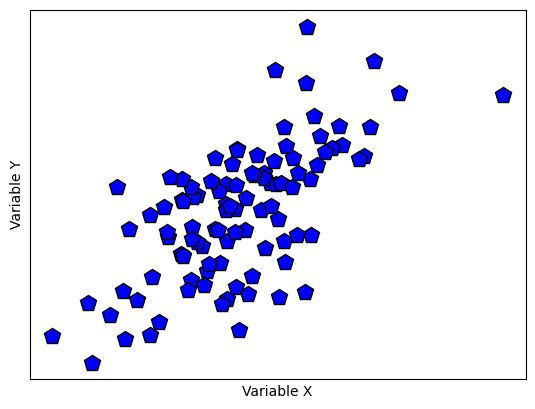

In [48]:
## compute a correlation for two sets of random numbers with a correlation of .6 ##

# data simulation parameters
# number of samples
N = 100

# desired correlation coefficient
r = .6 

# random nubers
x = np.random.randn(N)
y = np.random.randn(N)

# impose the correlation on y
y = x*r + y*np.sqrt(1-r**2)

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

In [49]:
## compute a correlation for two sets of random numbers with a correlation of .6 ##

# compute the empirical correlation
empR = np.corrcoef(x,y)
print('Desired r=%g, empirical r=%g'%(r,empR[0,1]))

Desired r=0.6, empirical r=0.661328


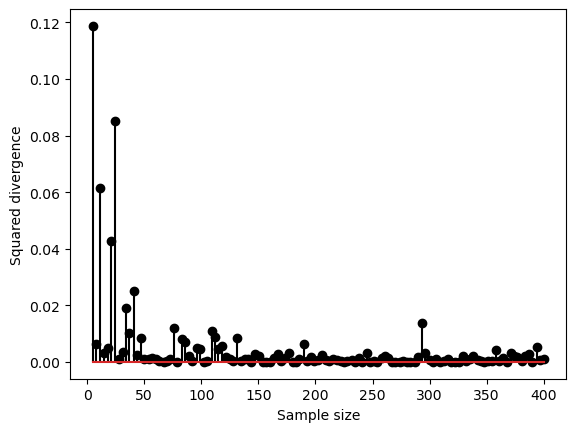

In [50]:
## Test the errors as a function of N

# range of sample sizes
Ns = np.round( np.linspace(5,400,123) ).astype(int)

# theoretical correlation coefficient (fixed)
r = .6

# initialize
corrs = np.zeros(len(Ns))

# run the experiment!
for ni in range(len(Ns)):
    x = np.random.randn(Ns[ni])
    y = x*r + np.random.randn(Ns[ni])*np.sqrt(1-r**2)
    corrs[ni] = (r-np.corrcoef(x,y)[0,1])**2
    

plt.stem(Ns,corrs,'ko-')
plt.xlabel('Sample size')
plt.ylabel('Squared divergence')
plt.show()

1.2632513491482102


1.2632513491482102
